In [1]:
library(MASS)
data7 <- read.table('../mvadata/data7-1.txt', header=T)
data7.lda <- lda(group ~ ., data=data7)
data7.lda

Call:
lda(group ~ ., data = data7)

Prior probabilities of groups:
       g1        g2 
0.5384615 0.4615385 

Group means:
          x1       x2       x3
g1 110.57143 88.00000 43.57143
g2  98.33333 80.66667 37.16667

Coefficients of linear discriminants:
          LD1
x1  0.2727114
x2 -0.2794634
x3 -0.5128692

In [5]:
t(data7.lda$prior)
data7.lda$means
data7.lda$scaling

g1,g2
0.5384615,0.4615385


,x1,x2,x3
g1,110.57143,88.00000,43.57143
g2,98.33333,80.66667,37.16667


,LD1
x1,0.2727114
x2,-0.2794634
x3,-0.5128692


In [11]:
# 적합
pred.lda <- predict(data7.lda, newdata=data7)
t(pred.lda)
# psterior=사후확률 ,x=ld=선형 판별 함수의 계수

class,posterior,x
<fct>,"<dbl[,2]>","<dbl[,1]>"
"2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2","0.35014011, 0.15881893, 0.97194803, 0.92101209, 0.96899785, 0.98515585, 0.97539841, 0.05593911, 0.03967580, 0.04071603, 0.60970846, 0.36250801, 0.14861250, 0.64985989, 0.84118107, 0.02805197, 0.07898791, 0.03100215, 0.01484415, 0.02460159, 0.94406089, 0.96032420, 0.95928397, 0.39029154, 0.63749199, 0.85138750","0.46371609, 0.98888267, -1.62152084, -1.07609809, -1.56991779, -1.94702728, -1.68902670, 1.56927236, 1.74986837, 1.73636427, -0.06940923, 0.43670788, 1.02818830"


In [12]:
pred.lda$class

[1] g2 g2 g1 g1 g1 g1 g1 g2 g2 g2 g1 g2 g2
Levels: g1 g2

In [13]:
t(pred.lda$posterior)

,1,2,3,4,5,6,7,8,9,10,11,12,13
g1,0.3501401,0.1588189,0.97194803,0.92101209,0.96899785,0.98515585,0.97539841,0.05593911,0.0396758,0.04071603,0.6097085,0.362508,0.1486125
g2,0.6498599,0.8411811,0.02805197,0.07898791,0.03100215,0.01484415,0.02460159,0.94406089,0.9603242,0.95928397,0.3902915,0.637492,0.8513875


In [14]:
t(pred.lda$x)

,1,2,3,4,5,6,7,8,9,10,11,12,13
LD1,0.4637161,0.9888827,-1.621521,-1.076098,-1.569918,-1.947027,-1.689027,1.569272,1.749868,1.736364,-0.06940923,0.4367079,1.028188


In [15]:
#분류점수 구하기
prior <- data7.lda$prior
scaling <- data7.lda$scaling
scaling

,LD1
x1,0.2727114
x2,-0.2794634
x3,-0.5128692


In [16]:
d.means <- data7.lda$means
d.means

,x1,x2,x3
g1,110.57143,88.00000,43.57143
g2,98.33333,80.66667,37.16667


In [20]:
prior * d.means
means <- colSums(prior * d.means)
means

,x1,x2,x3
g1,59.53846,47.38462,23.46154
g2,45.38462,37.23077,17.15385


x1        x2        x3 
104.92308  84.61538  40.61538

In [27]:
x <- data7[,-1]
t(x)

x1,98,103,103,105,109,123,133,93,94,96,101,102,104
x2,81,84,86,86,88,92,99,74,78,80,84,85,83
x3,38,38,42,42,44,50,51,37,35,35,39,38,39


x1,-6.923077,18.38462,62.38462,0.07692308,24.38462,82.38462,28.07692,8.384615,53.38462,-8.923077,16.38462,61.38462,-0.9230769
x2,-3.615385,43.38462,-18.92308,1.38461538,47.38462,-12.92308,14.38462,33.384615,-26.92308,-4.615385,43.38462,-19.92308,-1.6153846
x3,-2.615385,-66.92308,-42.61538,1.38461538,-60.92308,-34.61538,10.38462,-67.923077,-49.61538,-5.615385,-65.92308,-46.61538,-1.6153846


In [48]:
# scale은 평균을 뺀다. 
dscore <- scale(x, center=means, scale=F)
t(dscore) #1
t(x) - means #2

x1,-6.923077,-1.9230769,-1.923077,0.07692308,4.076923,18.076923,28.07692,-11.923077,-10.923077,-8.923077,-3.9230769,-2.9230769,-0.9230769
x2,-3.615385,-0.6153846,1.384615,1.38461538,3.384615,7.384615,14.38462,-10.615385,-6.615385,-4.615385,-0.6153846,0.3846154,-1.6153846
x3,-2.615385,-2.6153846,1.384615,1.38461538,3.384615,9.384615,10.38462,-3.615385,-5.615385,-5.615385,-1.6153846,-2.6153846,-1.6153846


x1,-6.923077,-1.9230769,-1.923077,0.07692308,4.076923,18.076923,28.07692,-11.923077,-10.923077,-8.923077,-3.9230769,-2.9230769,-0.9230769
x2,-3.615385,-0.6153846,1.384615,1.38461538,3.384615,7.384615,14.38462,-10.615385,-6.615385,-4.615385,-0.6153846,0.3846154,-1.6153846
x3,-2.615385,-2.6153846,1.384615,1.38461538,3.384615,9.384615,10.38462,-3.615385,-5.615385,-5.615385,-1.6153846,-2.6153846,-1.6153846


In [49]:
# 비교
dscore <- dscore %*% scaling
t(dscore) #1
t(pred.lda$x) #2

LD1,0.4637161,0.9888827,-1.621521,-1.076098,-1.569918,-1.947027,-1.689027,1.569272,1.749868,1.736364,-0.06940923,0.4367079,1.028188


,1,2,3,4,5,6,7,8,9,10,11,12,13
LD1,0.4637161,0.9888827,-1.621521,-1.076098,-1.569918,-1.947027,-1.689027,1.569272,1.749868,1.736364,-0.06940923,0.4367079,1.028188


In [52]:
#LDA를 이용한 분류
library(klaR)

Warning message:
“package ‘klaR’ was built under R version 4.0.5”


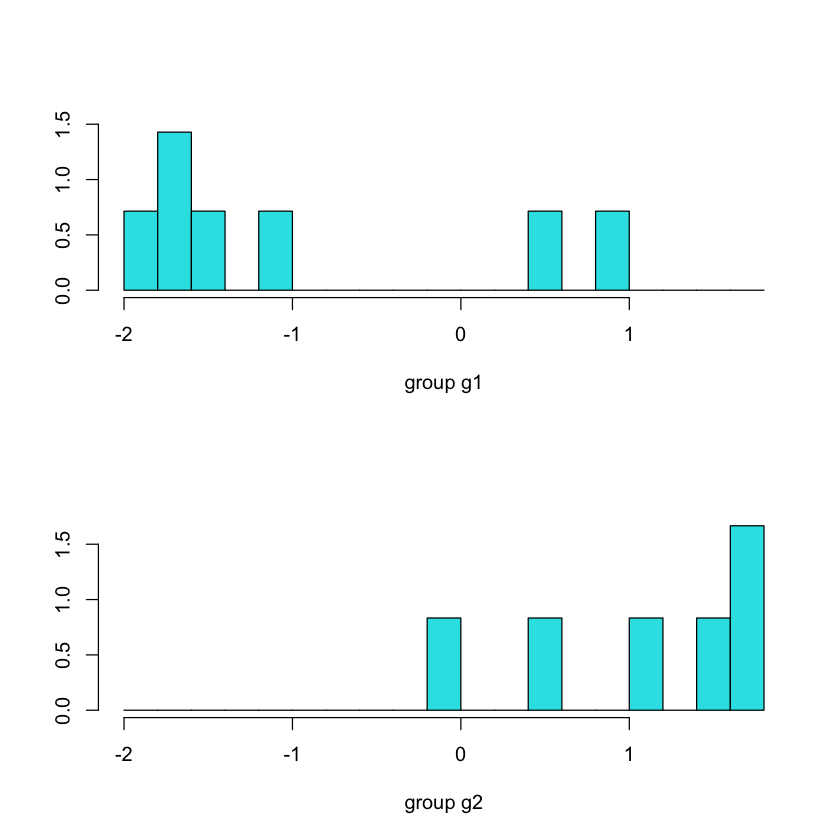

In [53]:
ldahist(pred.lda$x, g=data7$group)

integer(0)

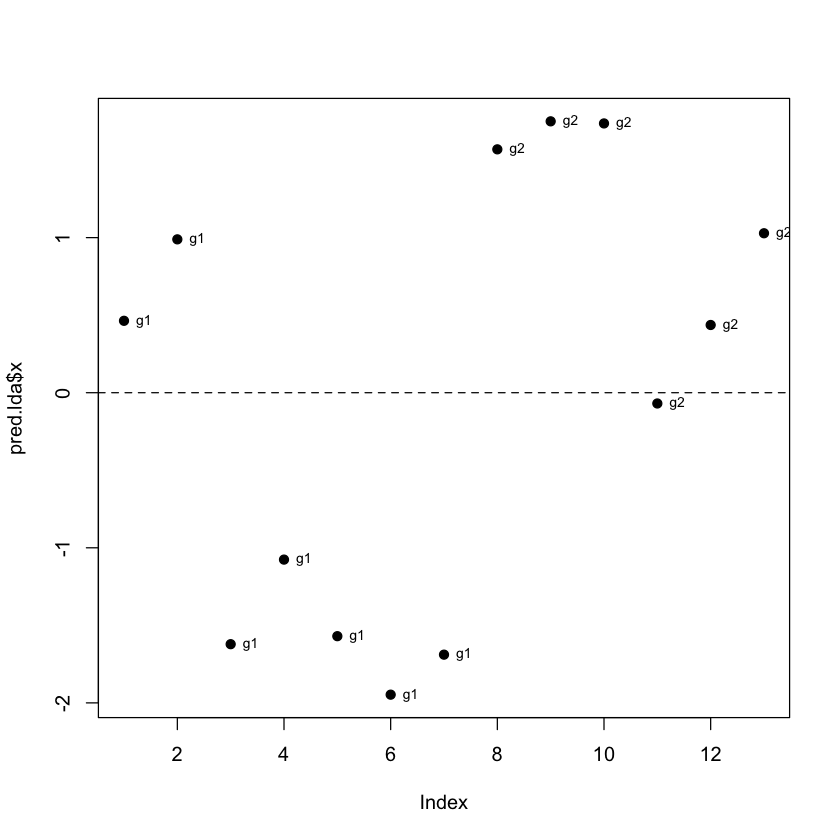

In [56]:
plot(pred.lda$x, pch=19)
text(pred.lda$x, data7$group, cex=0.7, pos=4)
abline(h=0, lty=2)
identify(pred.lda$x)
# 1,211

In [57]:
# 판별 모형의 평가
x <- data7[, -1]
t(x)

x1,98,103,103,105,109,123,133,93,94,96,101,102,104
x2,81,84,86,86,88,92,99,74,78,80,84,85,83
x3,38,38,42,42,44,50,51,37,35,35,39,38,39


In [61]:
# 1.람다 통계량
data7.man <- manova(as.matrix(x) ~ pred.lda$class)
data7.man

Call:
   manova(as.matrix(x) ~ pred.lda$class)

Terms:
                pred.lda$class Residuals
x1                    611.8755  941.0476
x2                    230.8150  240.2619
x3                    182.8864  130.1905
Deg. of Freedom              1        11

Residual standard errors: 9.249313 4.673542 3.440276
Estimated effects may be unbalanced

In [62]:
wilks.test <- summary(data7.man, test='Wilks')
wilks.test
#wilks점수가 0.16683으로 0에 가깝다

               Df   Wilks approx F num Df den Df    Pr(>F)    
pred.lda$class  1 0.16683   14.983      3      9 0.0007604 ***
Residuals      11                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [63]:
# 2.분류표
confm.lda <- table(data7$group, pred_lda$class)
confm.lda
# g1은 7개 중에 2개 잘못 분류, g2는 6개 중에 1개 잘못 분류

    
     g1 g2
  g1  5  2
  g2  1  5

In [64]:
prop.table(confm.lda,1 )

    
            g1        g2
  g1 0.7142857 0.2857143
  g2 0.1666667 0.8333333

In [66]:
error <- 1 - sum(diag(prop.table(confm.lda)))
error

[1] 0.2307692

In [ ]:
# 판별 변수 선택